In [260]:
import pandas as pd
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../reports/viz/full_04_01_2020/topic_distribs_to_bibcodes.csv', index_col=0)

/Users/abuonomo/code/DataSquad/astro2020/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.columns = df.columns[0:2].tolist() + [int(v) for v in df.columns[2:]]

In [271]:
topics = pd.DataFrame(df.iloc[:, 2:].values.argmax(axis=1))
topic_counts = topics[0].value_counts()

In [272]:
kwds_df_chunks = pd.read_json('../data/full_04_01_2020/kwds.jsonl', orient='records', lines=True, chunksize=10_000)
topic_kwds = defaultdict(list)
for kwds_df_chunk in tqdm(kwds_df_chunks):
    for t in tqdm(df.columns[2:]):
        tbool = df.iloc[:, 2:].values.argmax(axis=1) == t
        df_slice = df.iloc[tbool, :].loc[:, ['bibcode', 'titles', t]]

        kwds = kwds_df_chunk.set_index('bibcode').reindex(df_slice['bibcode'].tolist()).dropna()['keyword'].explode().tolist()
        topic_kwds[t] = topic_kwds[t] + kwds

In [166]:
counters = {k: Counter(v) for k, v in topic_kwds.items()}
kwd_counts_df = pd.DataFrame(counters)

In [291]:
marg_prob = kwd_counts_df.iloc[0, 0].sum() / kwd_counts_df.iloc[0].sum()
topic_prob = kwd_counts_df.iloc[0, 0].sum() / topic_counts.iloc[0]

In [199]:
kwd_counts_df.loc['Stars: Binaries: Spectroscopic'].argmax()

/Users/abuonomo/code/DataSquad/astro2020/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


45

In [243]:
kwd_counts_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
High Energy Physics - Phenomenology,7.0,3.0,1.0,NaN,NaN,4.0,3.0,2.0,14.0,1.0,...,NaN,NaN,NaN,3.0,NaN,1.0,16.0,2.0,NaN,NaN
Astrophysics,23.0,20.0,38.0,3.0,8.0,7.0,27.0,13.0,87.0,76.0,...,NaN,37.0,48.0,13.0,236.0,98.0,66.0,16.0,11.0,215.0
High Energy Physics - Theory,7.0,NaN,NaN,1.0,NaN,7.0,NaN,1.0,3.0,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
General Relativity and Quantum Cosmology,9.0,1.0,1.0,1.0,1.0,9.0,2.0,1.0,5.0,1.0,...,1.0,NaN,1.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
Nuclear Theory,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
galaxies: clusters: individual (Abell 2634),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Galaxy: Globular Clusters: Individual: NGC Number: NGC 7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Galaxies: Individual: Alphanumeric: DDO 154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
galaxies: individual (A0035-324),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [325]:
top_kwds = kwd_counts_df.loc[:, 35].sort_values(ascending=False).iloc[0:13]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

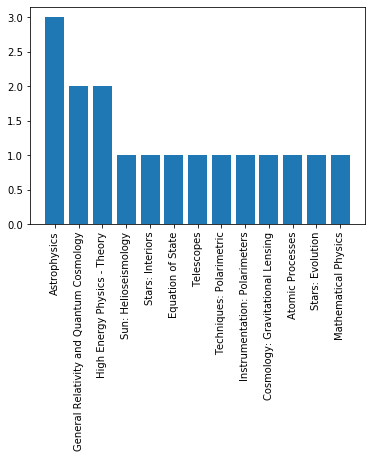

In [326]:
plt.bar(top_kwds.index.tolist(), top_kwds.tolist())
plt.xticks(rotation='vertical')

In [327]:
[i for i in kwd_counts_df.index if 'binar' in i.strip().lower()]

['Stars: Binaries: Spectroscopic',
 'Stars: Binaries: Eclipsing',
 'X-Rays: Binaries',
 'Stars: Binaries: General',
 'Stars: Binaries: Close',
 'Stars: Binaries: Symbiotic',
 'Stars: Binaries: Visual']